# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Load the Data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their website to request records of daily precipitation from Seattle and New York (or other locations of interest) for the 3 year period January 2020 - January 2024.


Load the Seattle data set

In [3]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/kikayjane/Seattle-Weather/main/seattle_rain.csv')

Load the New York data set

In [4]:
df_ny = pd.read_csv('https://raw.githubusercontent.com/kikayjane/Seattle-Weather/main/ny_rain.csv')

#Inspect the Contents of Each Data Set

In [5]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [6]:
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


In [7]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


# Convert Columns to the Correct Data Types

In [8]:
print(df_seattle.columns)
print(df_ny.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')
Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')


In [9]:
df_seattle.columns.unique() == df_seattle.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [10]:
set(df_seattle.columns) == set(df_ny.columns)

True

In [11]:
# Checking the types
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [12]:
# Setting date column to numerical variable
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])

In [13]:
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [14]:
df_ny.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [15]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   ELEVATION  7003 non-null   float64       
 5   DATE       7003 non-null   datetime64[ns]
 6   DAPR       143 non-null    float64       
 7   MDPR       143 non-null    float64       
 8   PRCP       6718 non-null   float64       
 9   SNOW       3006 non-null   float64       
 10  SNWD       1331 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 711.4+ KB


In [16]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    17465 non-null  object        
 1   NAME       17465 non-null  object        
 2   LATITUDE   17465 non-null  float64       
 3   LONGITUDE  17465 non-null  float64       
 4   ELEVATION  17465 non-null  float64       
 5   DATE       17465 non-null  datetime64[ns]
 6   DAPR       155 non-null    float64       
 7   MDPR       151 non-null    float64       
 8   PRCP       17275 non-null  float64       
 9   SNOW       11508 non-null  float64       
 10  SNWD       6318 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 1.7+ MB


# Remove Unnecessary Parts of the Data Sets

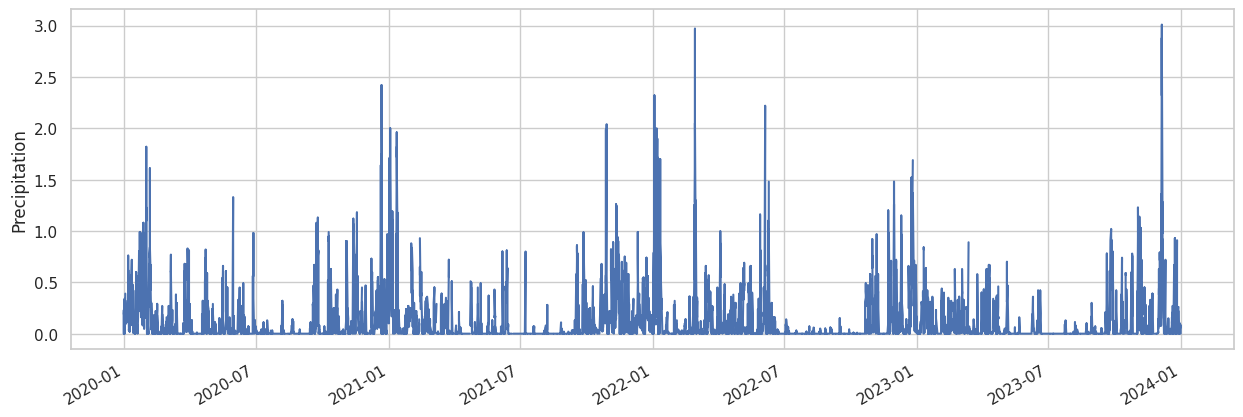

In [17]:
fig, ax = plt.subplots()
ax.plot(df_seattle["DATE"], df_seattle["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 5)

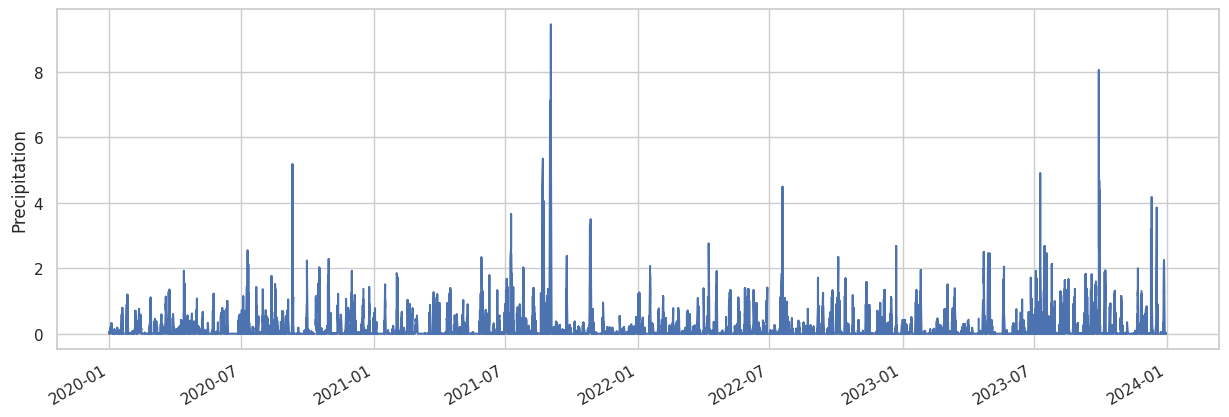

In [18]:
fig, ax = plt.subplots()
ax.plot(df_ny["DATE"], df_ny["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 5)

In [19]:
# Remove unnecessarry columns
bad_cols = ["ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]
df_seattle = df_seattle.drop(columns = bad_cols)
df_ny = df_ny.drop(columns = bad_cols)

In [20]:
# Check
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   DATE       7003 non-null   datetime64[ns]
 5   PRCP       6718 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 328.4+ KB


In [21]:
df_seattle["NAME"].unique()

array(['SEATTLE 4.5 N, WA US', 'SEATTLE 6.5 SSW, WA US',
       'SEATTLE 3.9 SSW, WA US', 'SEATTLE 4.2 N, WA US',
       'SEATTLE 5.6 N, WA US', 'SEATTLE 2.1 ESE, WA US',
       'SEATTLE TACOMA AIRPORT, WA US', 'SEATTLE 5.8 SSE, WA US',
       'SEATTLE 5.5 NNE, WA US', 'SEATTLE 2.5 SE, WA US'], dtype=object)

In [22]:
df_ny["NAME"].unique()

array(['NY CITY CENTRAL PARK, NY US', 'ARMONK 0.3 SE, NY US',
       'WANTAGH 0.3 ESE, NY US', 'FARMINGDALE REPUBLIC AIRPORT, NY US',
       'ALBERTSON 0.2 SSE, NY US', 'JFK INTERNATIONAL AIRPORT, NY US',
       'AMITYVILLE 0.1 WSW, NY US', 'FLORAL PARK 0.4 W, NY US',
       'CENTERPORT 0.9 SW, NY US', 'BRIARCLIFF MANOR 1.3 NE, NY US',
       'QUEENS 4.7 SW, NY US', 'THORNWOOD 0.7 NW, NY US',
       'STATEN ISLAND 2.6 N, NY US',
       'MATTHEWS PALMER PLAYGROUND NEW YORK 6.8 NNW, NY US',
       'NEW HEMPSTEAD 0.6 SE, NY US', 'LITTLE NECK 0.3 SE, NY US',
       'ALBERTSON 0.5 SW, NY US', 'SPRING VALLEY 1.7 SSW, NY US',
       'LINDENHURST 1.0 NE, NY US', 'EAST ROCKAWAY 0.5 S, NY US'],
      dtype=object)

In [23]:
df_seattle.head(30)

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,2020-01-01,0.19
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,2020-01-01,0.23
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-01-01,0.19
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-01,0.13
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,2020-01-01,0.22
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",47.611700,-122.308500,2020-01-01,0.15
6,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,2020-01-01,0.19
7,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.444670,-122.314420,2020-01-01,0.00
8,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-01,0.13
9,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,2020-01-01,0.23


# Identify Missing Values in the Data Sets

In [24]:
# Average across all stations in each city
df_seattle_avg = df_seattle.groupby(by = "DATE", as_index = False)["PRCP"].mean()
df_ny_avg = df_ny.groupby(by = "DATE", as_index = False)["PRCP"].mean()

In [25]:
df_seattle_avg.head(20)

,DATE,PRCP
0,2020-01-01,0.162500
1,2020-01-02,0.181250
2,2020-01-03,0.267500
3,2020-01-04,0.172000
4,2020-01-05,0.168571
5,2020-01-06,0.233333
6,2020-01-07,0.511111
7,2020-01-08,0.042500
8,2020-01-09,0.060000
9,2020-01-10,0.167778


In [26]:
# Ensure that they are the same length
print(len(df_ny_avg) == len(df_seattle_avg))
print(len(df_ny_avg))

True
1461


<Axes: >

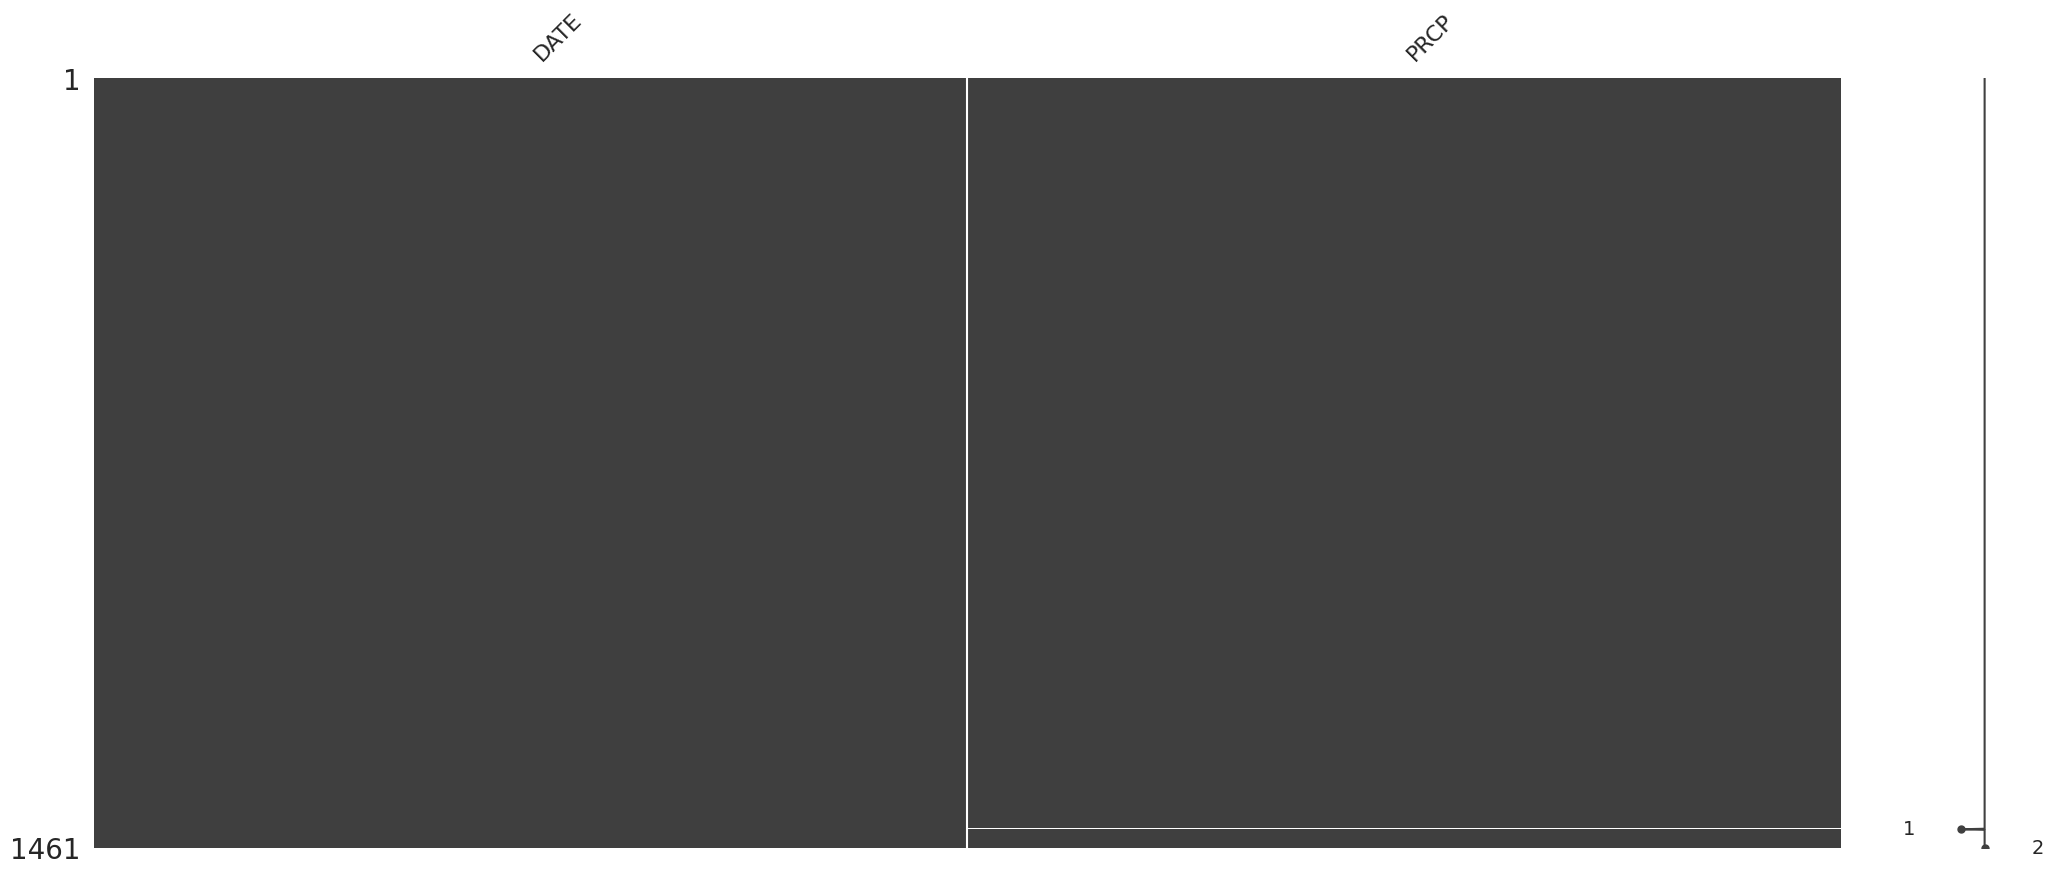

In [27]:
msno.matrix(df_seattle_avg[['DATE','PRCP']])

<Axes: >

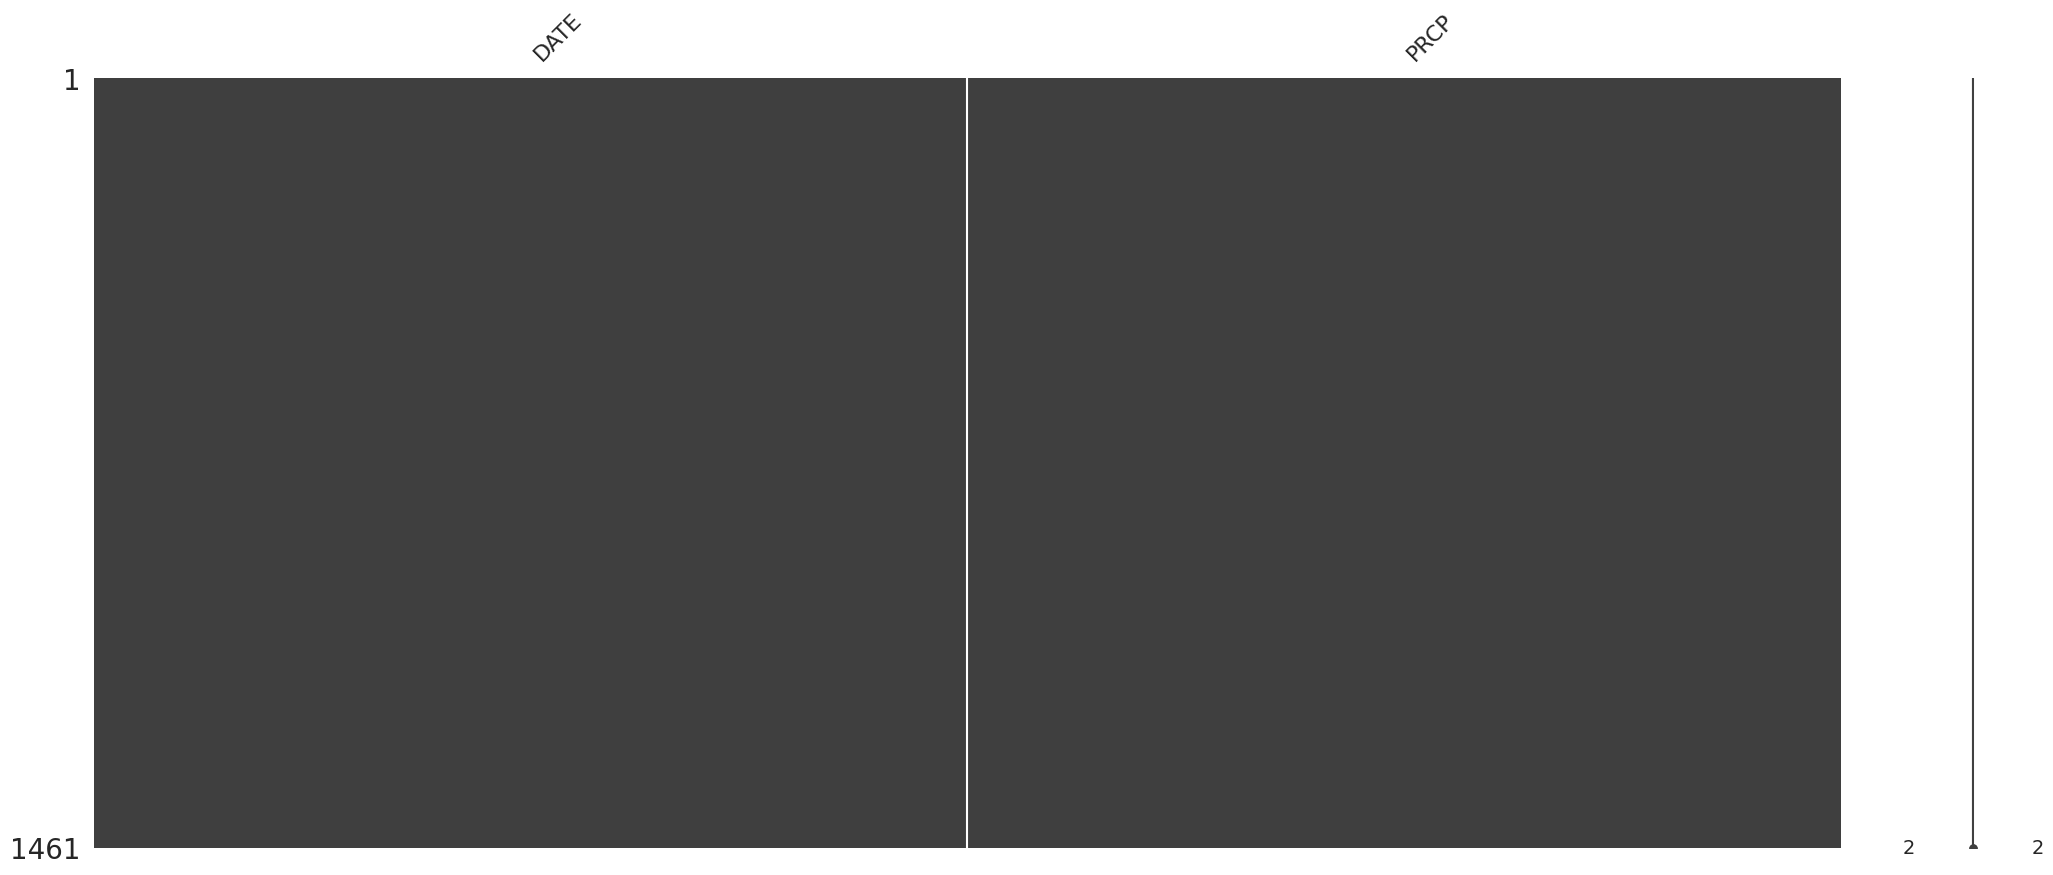

In [28]:
msno.matrix(df_ny_avg[['DATE','PRCP']])

# Join Seattle and New York Data Frames

In [29]:
df_seattle_avg = df_seattle_avg.drop_duplicates(subset = "DATE")
df_ny_avg = df_ny_avg.drop_duplicates(subset = "DATE")

In [30]:
df_ny_avg.shape

(1461, 2)

In [31]:
df = df_ny_avg[['DATE','PRCP']].merge(df_seattle_avg[['DATE','PRCP']], on = 'DATE', how = 'left')

In [32]:
df.shape

(1461, 3)

# Ensure Data Frame is in a Tidy Format

In [33]:
df_tidy = pd.melt(df, id_vars = 'DATE', var_name = 'city', value_name = 'PRCP')
df_tidy

,DATE,city,PRCP
0,2020-01-01,PRCP_x,0.013333
1,2020-01-02,PRCP_x,0.000000
2,2020-01-03,PRCP_x,0.134444
3,2020-01-04,PRCP_x,0.200000
4,2020-01-05,PRCP_x,0.040000
...,...,...,...
2917,2023-12-27,PRCP_y,0.063333
2918,2023-12-28,PRCP_y,0.240000
2919,2023-12-29,PRCP_y,0.055000
2920,2023-12-30,PRCP_y,0.042500


# Rename Columns and Values

In [34]:
# Rename city values
df_tidy.loc[df_tidy['city'] == 'PRCP_x', 'city'] = 'NYC'
df_tidy.loc[df_tidy['city'] == 'PRCP_y', 'city'] = 'SEA'

In [35]:
df_tidy

,DATE,city,PRCP
0,2020-01-01,NYC,0.013333
1,2020-01-02,NYC,0.000000
2,2020-01-03,NYC,0.134444
3,2020-01-04,NYC,0.200000
4,2020-01-05,NYC,0.040000
...,...,...,...
2917,2023-12-27,SEA,0.063333
2918,2023-12-28,SEA,0.240000
2919,2023-12-29,SEA,0.055000
2920,2023-12-30,SEA,0.042500


In [36]:
mapping_dict = {'DATE':'date','city':'city','PRCP':'precipitation'}

In [37]:
df_tidy = df_tidy.rename(columns = mapping_dict)
df_tidy

,date,city,precipitation
0,2020-01-01,NYC,0.013333
1,2020-01-02,NYC,0.000000
2,2020-01-03,NYC,0.134444
3,2020-01-04,NYC,0.200000
4,2020-01-05,NYC,0.040000
...,...,...,...
2917,2023-12-27,SEA,0.063333
2918,2023-12-28,SEA,0.240000
2919,2023-12-29,SEA,0.055000
2920,2023-12-30,SEA,0.042500


# Impute or Remove NaN Values

<Axes: >

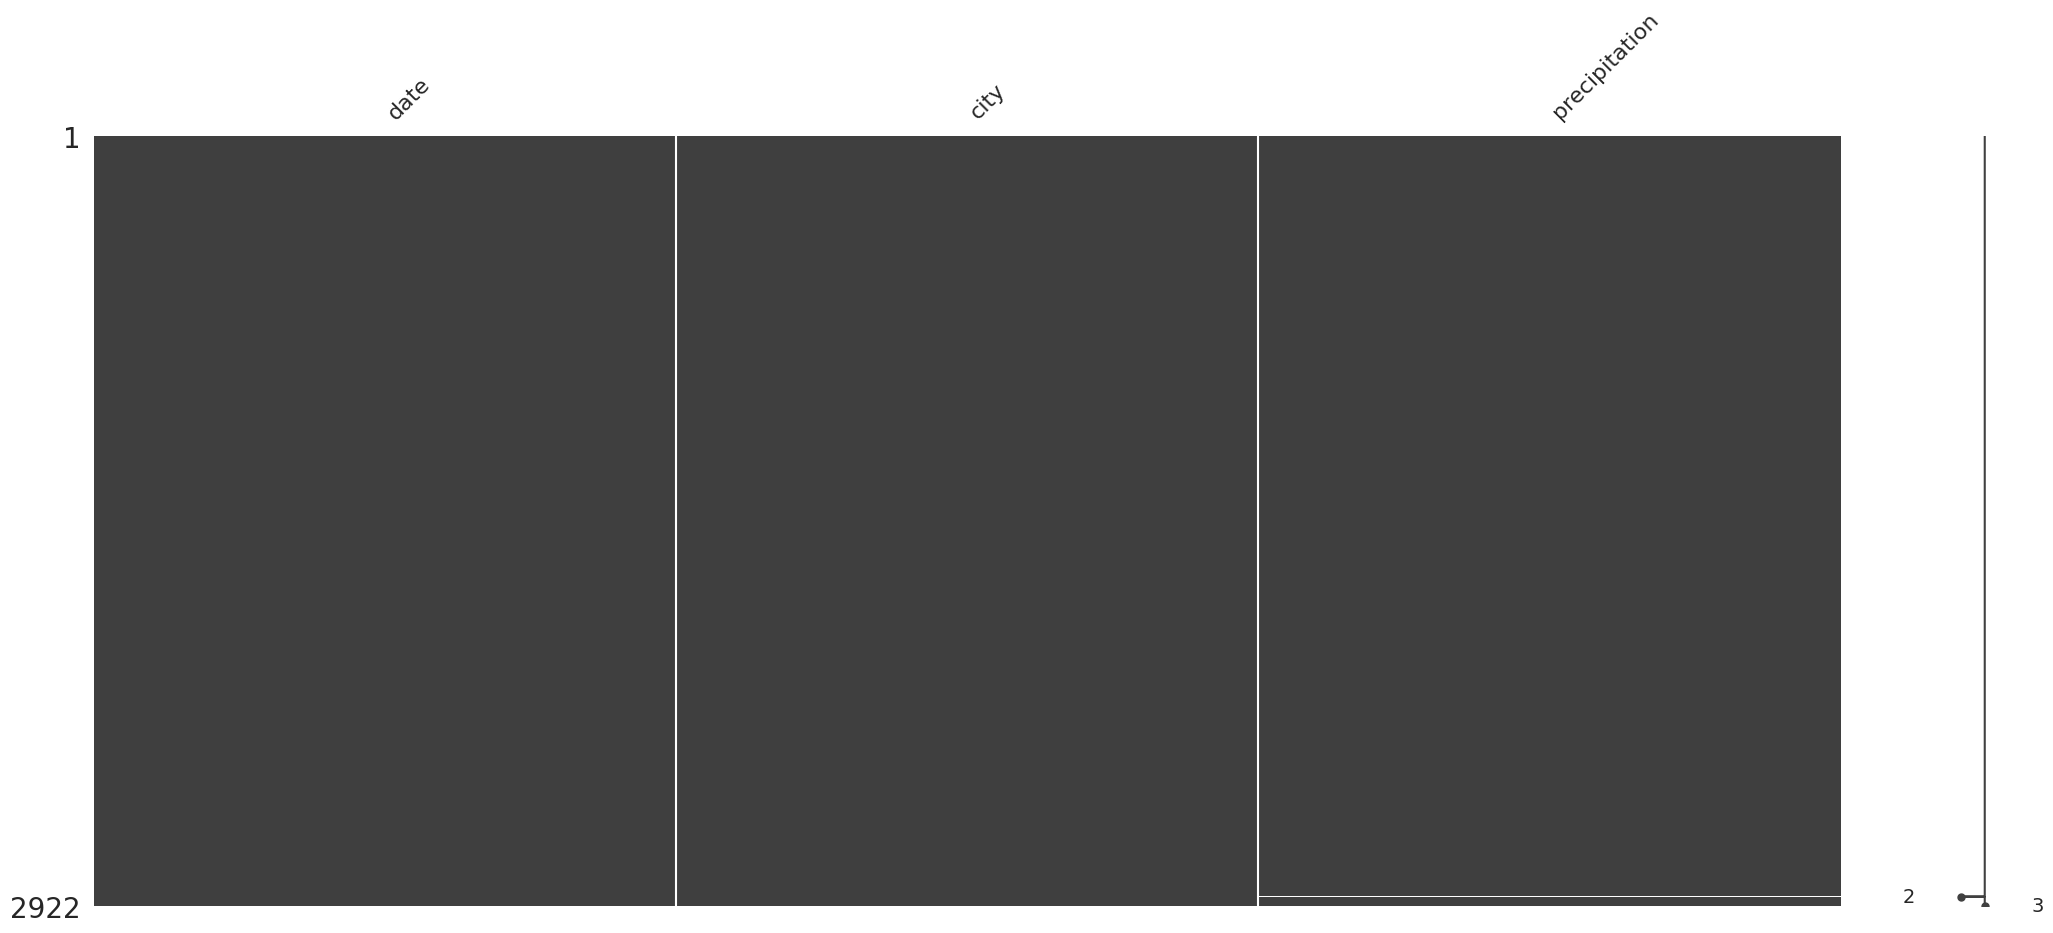

In [38]:
msno.matrix(df_tidy)

In [39]:
df_tidy.tail(40)

,date,city,precipitation
2882,2023-11-22,SEA,0.376667
2883,2023-11-23,SEA,0.000000
2884,2023-11-24,SEA,0.000000
2885,2023-11-25,SEA,NaN
2886,2023-11-26,SEA,0.000000
2887,2023-11-27,SEA,0.000000
2888,2023-11-28,SEA,0.000000
2889,2023-11-29,SEA,0.000000
2890,2023-11-30,SEA,0.048000
2891,2023-12-01,SEA,0.466000


In [40]:
# Fill in the NaN value in row 2885
df_tidy['precipitation'].fillna(0,inplace=True)

In [41]:
df_tidy.tail(40)

,date,city,precipitation
2882,2023-11-22,SEA,0.376667
2883,2023-11-23,SEA,0.000000
2884,2023-11-24,SEA,0.000000
2885,2023-11-25,SEA,0.000000
2886,2023-11-26,SEA,0.000000
2887,2023-11-27,SEA,0.000000
2888,2023-11-28,SEA,0.000000
2889,2023-11-29,SEA,0.000000
2890,2023-11-30,SEA,0.048000
2891,2023-12-01,SEA,0.466000


In [42]:
df_tidy['precipitation'] = df_tidy['precipitation'].apply(lambda x: round(x,6))

In [43]:
df_tidy["date"] = pd.to_datetime(df_tidy["date"])

In [46]:
# Add month and year columns
df_tidy['month'] = pd.DatetimeIndex(df_tidy['date']).month
df_tidy["year"] = df_tidy["date"].dt.year

# Export the Clean .csv File

In [47]:
df_tidy.to_csv('clean_seattle_nyc_weather.csv', index = False)